<a href="https://colab.research.google.com/github/Lucasaor/DataScienceProjects/blob/master/Deep_Learning_com_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1><font color='red' style='font-size: 36px;'>  Deep Learning com Keras </font> </h1>
<hr style='border: 2px solid red;'>

Criado por: [@lucasaor](https://github.com/lucasaor)



# Importando o DataSet

Neste notebook será abordada uma aplicação de *Deep Learning* utilizando o **TensorFlow**, especificamente com a API de alto nível Keras. Vamos construir um exemplode aplicação para e-commerce, focado em um loja virtual de roupas.

O DataSet que será utilizado já está implementado diretamente no Keras, no pacote ```keras.datasets.fashion_mnist```.

In [ ]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
import matplotlib.pyplot as plt

print(tf.__version__)

2.1.0


In [ ]:
SEED = 777
np.random.seed(SEED)

dataset = keras.datasets.fashion_mnist
((imagens_treino,identificacoes_treino),(imagens_teste,identificacoes_teste)) = dataset.load_data()
imagens_treino.shape


(60000, 28, 28)

O dataset importado consiste em imagens de roupas reduzidas para escala de cinza em figuras de 28x28 pixels. Para poder visualizar
estas imagens, vamos utilizar o ```matplotlib``` e o comando ```implot()```. Tomando uma dos elementos do array de imagens de treino como exemplo, é possível visualizar a imagem que este representa.

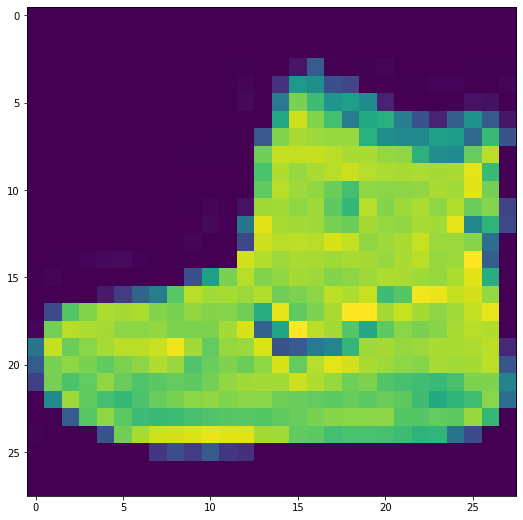

In [ ]:
f, ax = plt.subplots(figsize=(16,9))
ax = plt.imshow(imagens_treino[0])
plt.show()

Ao analisar os valores de identificação das imagens, nota-se 10 tipos de roupas diferentes (0 a 9). esta classificação está descrita na documentação da ```fashion_mnist```, disponível [aqui](https://github.com/zalandoresearch/fashion-mnist). Importamos esta referência em uma ```list```.
Sendo assim, é possível apresentar todos os tipos de imagens que temos no dataset em um subplot, conforme o código abaixo.

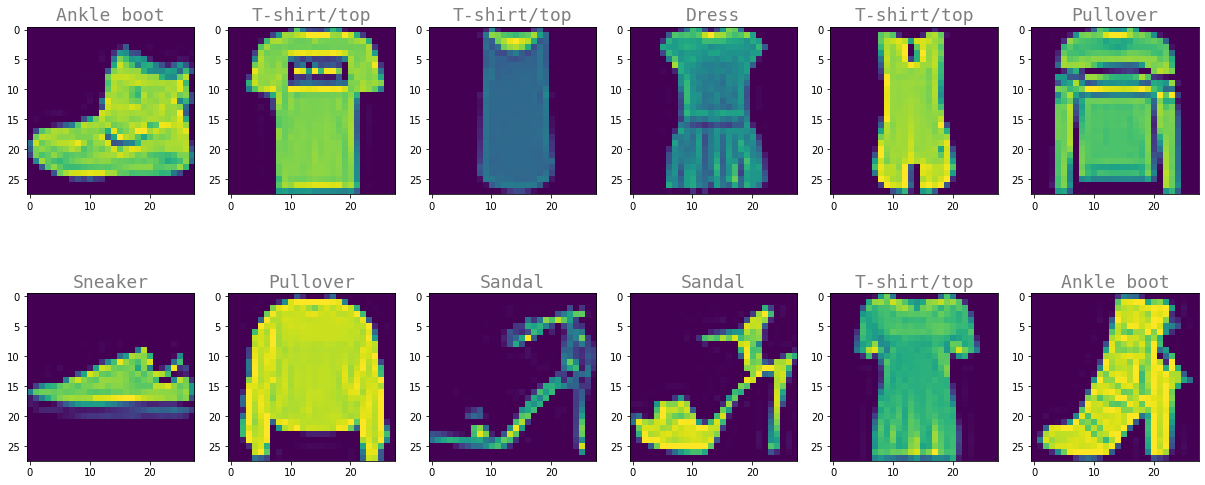

In [ ]:
#classificações do fashion_mnist
nomes_de_classificoes = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

#configurações do plt
f, ax = plt.subplots(figsize=(21,9))

font = {'family': 'monospace',
        'color':  'gray',
        'weight': 'normal',
        'size': 18,
        }
#iterações para construir o plot
for imagem in range(12):
    plt.subplot(2,6,imagem+1)
    ax = plt.imshow(imagens_treino[imagem])
    plt.title(nomes_de_classificoes[identificacoes_treino[imagem]],fontdict=font)

plt.show()

# Criando as camadas da rede neural

O modelo a ser criado utilizando o Keras será um modelo **sequencial**, englobando as etapas de entrada, processamento e saída de dados. O Keras já possui isso implementado, no ```keras.Sequential()```. Cada uma das etapas será uma **camada** deste modelo sequencial.

A primeira camada, chamada **Camada 0**, será responsável por receber as imagens de entrada (matriz 28x28 pixels), e convertê-las em um array unidimensional, que facilita o processamento. Esta operação é conhecida como **Flatten**, e já está inclusa no Keras. 

A camada de processamento é a **Camada 1**, onde todos os elementos desta camada comunicarão com os elementos da camada anterior, formando assim uma *rede neural*. É sugerido que o tamanho desta camada seja uma base de 2 (para facilitar o processamento com bits). Aqui também aplicamos uma função de ativação do *TensorFlow* muito utilizada para redes neurais, a ```nn.relu```. Esta função é essencial para realizar processos de aprendizagem **não-linear** e está bem detalhada [aqui](https://machinelearningmastery.com/rectified-linear-activation-function-for-deep-learning-neural-networks/).

Por fim, a camada de sáida, **Camada 2**, irá implementar uma função que divide em pesos a probabilidade das entradas recebidas estarem relacionadas com cada uma das categorias identificadas (os 10 tipos de roupas neste exemplo). Isso é realizado através da função ```nn.softmax```.

In [ ]:
modelo =keras.Sequential([
            keras.layers.Flatten(input_shape=(28,28)),               # Camada 0
            keras.layers.Dense(256, activation=tf.nn.relu),  # Camada 1
            keras.layers.Dense(10, activation=tf.nn.softmax) # Camada 2
])

modelo.compile(optimizer='adam',loss='sparse_categorical_crossentropy')

modelo.fit(imagens_treino,identificacoes_treino)

Train on 60000 samples
60000/60000 [==============================] - 5s 92us/sample - loss: 4.2154


A forma que o modelo está interpretando as imagens não está considerando a escala de cinza das imagens de forma correta. Isso pode ser corrigido se *normalizarmos* (colocando os valores entre 0 e 1) esta informação antes de enviá-la ao modelo. Como a escala de cinza varia em 8 bits (de 0 a 255), basta dividir a entrada por esse valor em ```float``` que teremos um parâmetro normalizado.

In [ ]:
imagens_treino_normalizada = imagens_treino/float(255) #normalizando a entrada 

modelo =keras.Sequential([
            keras.layers.Flatten(input_shape=(28,28)),               # Camada 0
            keras.layers.Dense(256, activation=tf.nn.relu),  # Camada 1
            keras.layers.Dense(10, activation=tf.nn.softmax) # Camada 2
])


In [ ]:
modelo.compile(optimizer='adam',loss='sparse_categorical_crossentropy')

modelo.fit(imagens_treino_normalizada,identificacoes_treino)

Train on 60000 samples
60000/60000 [==============================] - 6s 106us/sample - loss: 0.4827


Comparando os dois resultados, é notável que a perda reduziu drasticamente mediante a normalização da entrada, o que representa uma grande melhora no desempenho da rede neural.

# Melhorando a formação de camadas

A rede criada para aprender os padrões apresentados possui, até o momento, apenas uma camada intermediária composta por 256 nós. Esta rede recebe uma entrada de 784 ($28^2$) nós, e repassa para uma rede de saída com apenas 10 nós. Para buscar uma melhoria, outras configurações para as camadas ocultas podem ser implementadas. Esta seção dedica-se à investigação das alternativas para esta construção.

Para testar esta hipótese, dois modelos auxiliares (```modelo_2``` e ```modelo_3```) são criados, o primeiro adicionando uma uma camada oculta de 128 nós após a Camada 1, e o segundo adicionando a de 128 e mais uma de 64 em sequência.

In [ ]:
modelo_2 =keras.Sequential([
            keras.layers.Flatten(input_shape=(28,28)),               # Camada 0
            keras.layers.Dense(256, activation=tf.nn.relu),  # Camada 1.1
            keras.layers.Dense(128, activation=tf.nn.relu),  # Camada 1.2
            keras.layers.Dense(10, activation=tf.nn.softmax) # Camada 2
])

modelo_2.compile(optimizer='adam',loss='sparse_categorical_crossentropy')

modelo_2.fit(imagens_treino_normalizada,identificacoes_treino)



Train on 60000 samples
60000/60000 [==============================] - 7s 113us/sample - loss: 0.4714


In [ ]:
modelo_3 =keras.Sequential([
            keras.layers.Flatten(input_shape=(28,28)),               # Camada 0
            keras.layers.Dense(256, activation=tf.nn.relu),  # Camada 1.1
            keras.layers.Dense(128, activation=tf.nn.relu),  # Camada 1.2
            keras.layers.Dense(64, activation=tf.nn.relu),  # Camada 1.3
            keras.layers.Dense(10, activation=tf.nn.softmax) # Camada 2
])

modelo_3.compile(optimizer='adam',loss='sparse_categorical_crossentropy')

modelo_3.fit(imagens_treino_normalizada,identificacoes_treino)

Train on 60000 samples
60000/60000 [==============================] - 7s 112us/sample - loss: 0.4841


Ao se adicionar a camada oculta extra no ```modelo_2```, este apresentou uma melhora quase insignificante em relação ao original, enquanto ainda aumentou o custo de processamento em 28%.

O ```modelo_3``` também não apresentou nenhuma mudança significativa na perda, gerando um custo ainda maior, 43% a mais.


Isso indica que **aumentar o número de camadas ocultas não é interessante para esta modelagem**.

# Adicionando mais épocas para o Modelo

Outra forma de melhorar os resultados do modelo criado é aumentar o número de épocas a serem executadas para o modelo, isto é, executar treinamentos adicionais do modelo sobre os mesmos dados para refinar os resultados

Isso pode ser executado adicionando o parâmetro ```epochs``` ao *fit* do modelo.

Existe também uma forma de medir a acurácia do modelo durante o treinamento da rede. Para isso, basta incluir o parâmetro ```metrics=['accuracy']``` ao compilador do modelo, e o *verbose* do processo irá incluir a acurácia em cada etapa.

In [ ]:
modelo =keras.Sequential([
            keras.layers.Flatten(input_shape=(28,28)),               # Camada 0
            keras.layers.Dense(256, activation=tf.nn.relu),  # Camada 1
            keras.layers.Dense(10, activation=tf.nn.softmax) # Camada 2
])

modelo.compile(optimizer='adam',
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

modelo.fit(imagens_treino_normalizada,identificacoes_treino, epochs=5)


Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 6s 96us/sample - loss: 0.4784 - accuracy: 0.8314
Epoch 2/5
60000/60000 [==============================] - 5s 88us/sample - loss: 0.3634 - accuracy: 0.8689
Epoch 3/5
60000/60000 [==============================] - 6s 93us/sample - loss: 0.3265 - accuracy: 0.8793
Epoch 4/5
60000/60000 [==============================] - 5s 90us/sample - loss: 0.3028 - accuracy: 0.8874
Epoch 5/5
60000/60000 [==============================] - 5s 92us/sample - loss: 0.2872 - accuracy: 0.8942


Observando a evolução da acurácia ao longo do treinamento do modelo, nota-se melhores resultados para o desempenho deste.

Dessa forma, a próxima etapa é utilizar os dados de teste para verificar se o comportamento do modelo está coerente ao aplicá-lo em novos dados.

In [ ]:
#normalizando a entrada de teste
imagens_teste_normalizada = imagens_teste/float(255)

perda_teste, acuracia_teste = modelo.evaluate(imagens_teste_normalizada,identificacoes_teste)
print(f"A acurácia do modelo no teste foi de: {round(acuracia_teste*100,2)}%")
print(f"A perda do modelo no teste foi de: {round(perda_teste,2)}")

10000/10000 [==============================] - 1s 53us/sample - loss: 0.3493 - accuracy: 0.8750
A acurácia do modelo no teste foi de: 87.5%
A perda do modelo no teste foi de: 0.35


# Controlando a parcela de validação
Ao encontrar dados novos, o modelo apresenta ma acurácia pior que a observada no treino. Uma forma de tentar contornar isso é aumentar a quantidade de dados dedicados à validação durante o treinamento da Rede Neural.

isso é realizado especificando o parâmetro ```validation_split``` durante o treinamento do modelo.

In [ ]:
modelo =keras.Sequential([
            keras.layers.Flatten(input_shape=(28,28)),               # Camada 0
            keras.layers.Dense(256, activation=tf.nn.relu),  # Camada 1
            keras.layers.Dense(10, activation=tf.nn.softmax) # Camada 2
])

modelo.compile(optimizer='adam',
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])


modelo.fit(imagens_treino_normalizada,
           identificacoes_treino, 
           epochs=5,
           validation_split=0.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/5
48000/48000 [==============================] - 5s 114us/sample - loss: 0.5013 - accuracy: 0.8236 - val_loss: 0.3971 - val_accuracy: 0.8562
Epoch 2/5
48000/48000 [==============================] - 5s 104us/sample - loss: 0.3699 - accuracy: 0.8658 - val_loss: 0.4033 - val_accuracy: 0.8541
Epoch 3/5
48000/48000 [==============================] - 5s 103us/sample - loss: 0.3364 - accuracy: 0.8768 - val_loss: 0.3483 - val_accuracy: 0.8752
Epoch 4/5
48000/48000 [==============================] - 5s 101us/sample - loss: 0.3090 - accuracy: 0.8860 - val_loss: 0.3322 - val_accuracy: 0.8782
Epoch 5/5
48000/48000 [==============================] - 5s 103us/sample - loss: 0.2904 - accuracy: 0.8926 - val_loss: 0.3456 - val_accuracy: 0.8760


In [ ]:
perda_teste, acuracia_teste = modelo.evaluate(imagens_teste_normalizada,identificacoes_teste)
print(f"A acurácia do modelo no teste foi de: {round(acuracia_teste*100,2)}%")
print(f"A perda do modelo no teste foi de: {round(perda_teste,2)}")

10000/10000 [==============================] - 1s 57us/sample - loss: 0.3706 - accuracy: 0.8666
A acurácia do modelo no teste foi de: 86.66%
A perda do modelo no teste foi de: 0.37


Logo, observando o resultado final é possível notar que a acurácia sobre dados novos sempre tende a ser menor. Porém, aumentar o tamanho da amostra de validação não trouxe ganhos expressivos ao desempenho do modelo.

## Gráfico de evolução do modelo

A função de treinamento de modelos do Keras gera um callback dehistórico que pode ser armazenado em uma variável.

Este histórico pode ser usado para uma análise visual da evolução das métricas do modelo ao longo do treinamento.

In [ ]:
modelo =keras.Sequential([
            keras.layers.Flatten(input_shape=(28,28)),               # Camada 0
            keras.layers.Dense(256, activation=tf.nn.relu),  # Camada 1
            keras.layers.Dense(10, activation=tf.nn.softmax) # Camada 2
])

modelo.compile(optimizer='adam',
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

historico = modelo.fit(imagens_treino_normalizada,
           identificacoes_treino, 
           epochs=10,
           validation_split=0.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 6s 116us/sample - loss: 0.5032 - accuracy: 0.8221 - val_loss: 0.4060 - val_accuracy: 0.8539
Epoch 2/10
48000/48000 [==============================] - 5s 100us/sample - loss: 0.3715 - accuracy: 0.8665 - val_loss: 0.4027 - val_accuracy: 0.8469
Epoch 3/10
48000/48000 [==============================] - 5s 104us/sample - loss: 0.3346 - accuracy: 0.8768 - val_loss: 0.3334 - val_accuracy: 0.8789
Epoch 4/10
48000/48000 [==============================] - 5s 106us/sample - loss: 0.3098 - accuracy: 0.8872 - val_loss: 0.3447 - val_accuracy: 0.8751
Epoch 5/10
48000/48000 [==============================] - 6s 125us/sample - loss: 0.2903 - accuracy: 0.8914 - val_loss: 0.3531 - val_accuracy: 0.8696
Epoch 6/10
48000/48000 [==============================] - 5s 102us/sample - loss: 0.2753 - accuracy: 0.8977 - val_loss: 0.3345 - val_accuracy: 0.8770
Epoch 7/10
48000/48000 [==========================

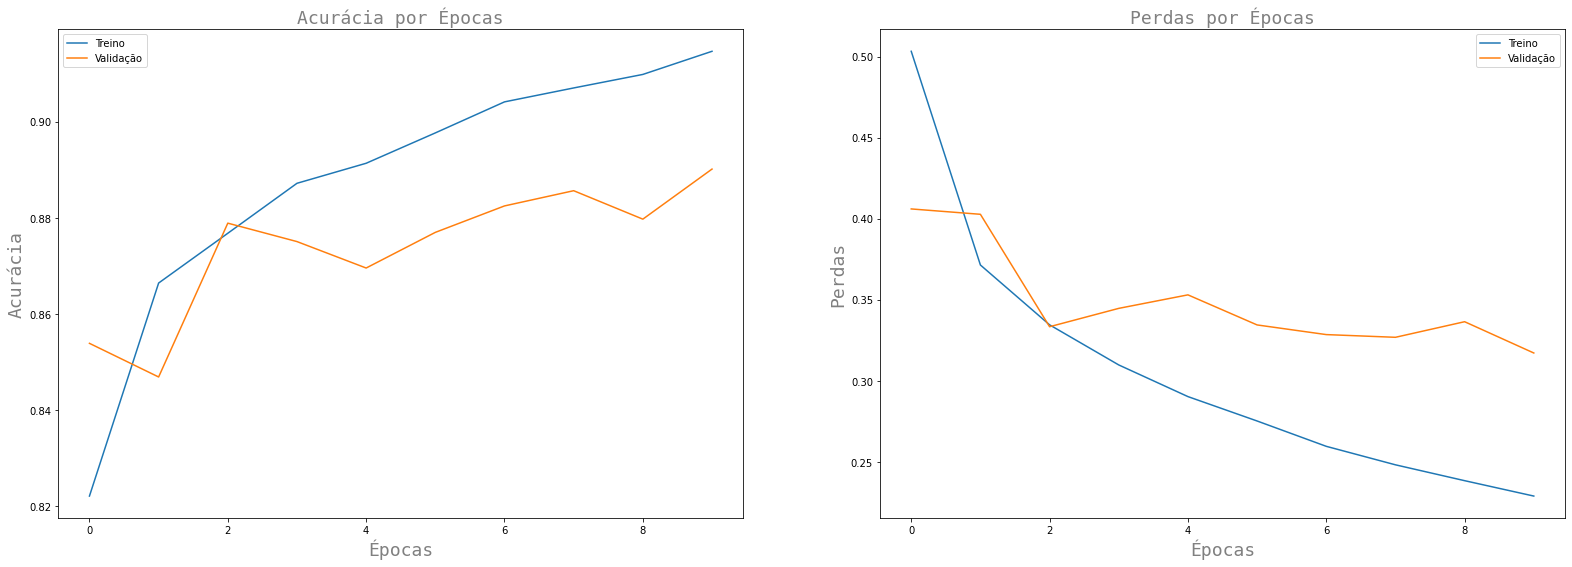

In [ ]:
f, ax = plt.subplots(figsize=(27,9))

ax = plt.subplot(1,2,1)
ax.plot(historico.history['accuracy'])
ax.plot(historico.history['val_accuracy'])
ax.set_title("Acurácia por Épocas",fontdict=font)
ax.set_xlabel("Épocas",fontdict=font)
ax.set_ylabel("Acurácia",fontdict=font)
ax.legend(['Treino','Validação'])

ax = plt.subplot(1,2,2)
ax.plot(historico.history['loss'])
ax.plot(historico.history['val_loss'])
ax.set_title("Perdas por Épocas",fontdict=font)
ax.set_xlabel("Épocas",fontdict=font)
ax.set_ylabel("Perdas",fontdict=font)
ax.legend(['Treino','Validação'])

plt.show()

Observando os gráficos de treinamento, fica claro que o modelo está se saindo muito melhor nos dados de treino do que nos dados de validação. Isso é um indício de *overfitting* no modelo, quando a rede está adaptada demais para os dados do treino e apresenta dificuldades para interpretar dados novos.

Uma técnica para reduzir o *overfitting* no modelo é adicionar uma camada de *Dropout* nas camadas ocultas para evitar que rede arpesente vícios no treinamento. Esta camada também é considerada uma forma de **normalização**.

In [ ]:
modelo =keras.Sequential([
            keras.layers.Flatten(input_shape=(28,28)),               # Camada 0
            keras.layers.Dense(256, activation=tf.nn.relu),  # Camada 1
            keras.layers.Dropout(0.2),                       # Camada 2 (reduzir overfitting)
            keras.layers.Dense(10, activation=tf.nn.softmax) # Camada 3
])

modelo.compile(optimizer='adam',
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

historico = modelo.fit(imagens_treino_normalizada,
           identificacoes_treino, 
           epochs=5,
           validation_split=0.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/5
48000/48000 [==============================] - 6s 129us/sample - loss: 0.5289 - accuracy: 0.8125 - val_loss: 0.3944 - val_accuracy: 0.8584
Epoch 2/5
48000/48000 [==============================] - 6s 119us/sample - loss: 0.3974 - accuracy: 0.8549 - val_loss: 0.3766 - val_accuracy: 0.8635
Epoch 3/5
48000/48000 [==============================] - 5s 114us/sample - loss: 0.3640 - accuracy: 0.8675 - val_loss: 0.3631 - val_accuracy: 0.8711
Epoch 4/5
48000/48000 [==============================] - 5s 107us/sample - loss: 0.3396 - accuracy: 0.8761 - val_loss: 0.3629 - val_accuracy: 0.8690
Epoch 5/5
48000/48000 [==============================] - 5s 112us/sample - loss: 0.3237 - accuracy: 0.8814 - val_loss: 0.3552 - val_accuracy: 0.8741


## Refazendo os gráficos

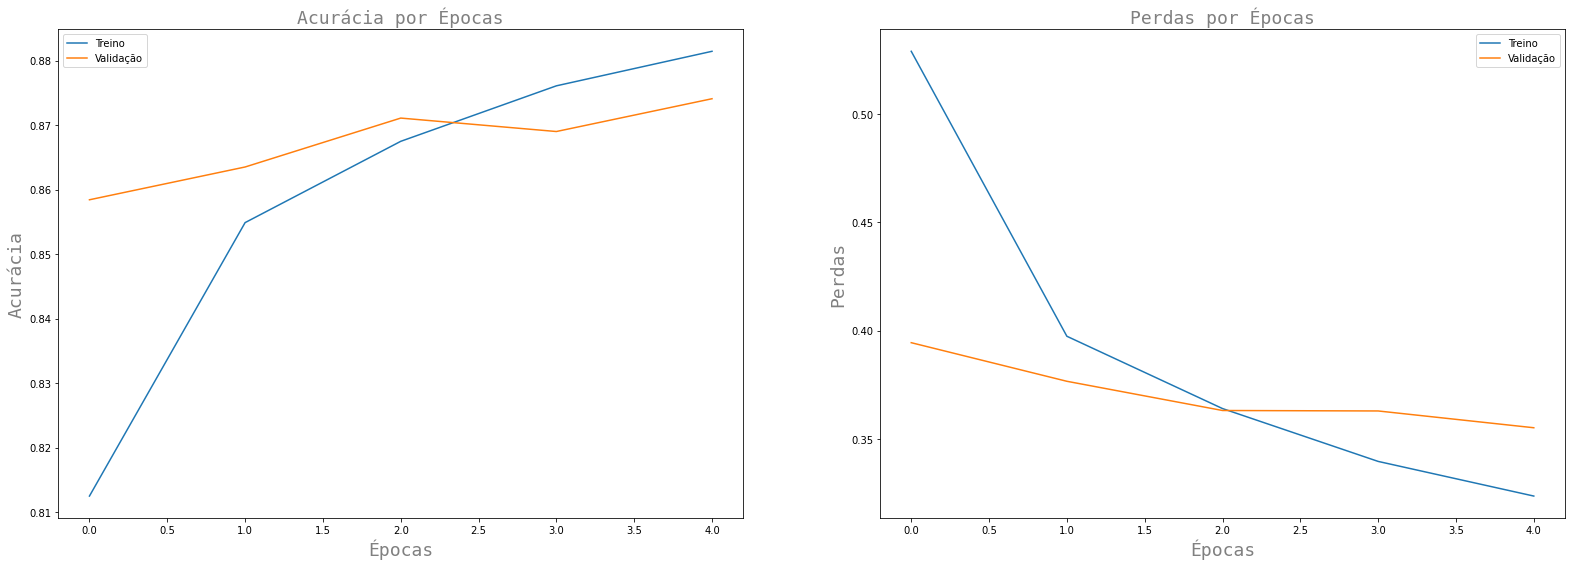

In [ ]:
f, ax = plt.subplots(figsize=(27,9))

ax = plt.subplot(1,2,1)
ax.plot(historico.history['accuracy'])
ax.plot(historico.history['val_accuracy'])
ax.set_title("Acurácia por Épocas",fontdict=font)
ax.set_xlabel("Épocas",fontdict=font)
ax.set_ylabel("Acurácia",fontdict=font)
ax.legend(['Treino','Validação'])

ax = plt.subplot(1,2,2)
ax.plot(historico.history['loss'])
ax.plot(historico.history['val_loss'])
ax.set_title("Perdas por Épocas",fontdict=font)
ax.set_xlabel("Épocas",fontdict=font)
ax.set_ylabel("Perdas",fontdict=font)
ax.legend(['Treino','Validação'])

plt.show()

# Salvando o Modelo

Após analisar o desempenho do modelo e chegar ao resultado satisfátório, o próximo passo é salvá-lo em um arquivo para aplicá-lo posteriormente em produção. Isso é feito através do método ```save()```.

Uma boa prática para versionamento do modelo é manter os principais parâmetros utilizados no nome do arquivo, como por exemplo o número de épocas utilizadas e o número de camadas na rede neural.

In [ ]:
modelo.save('modelo_5epocas_3camadas.h5')